# Decision Tree for HR Attrition Prediction

This notebook demonstrates how to use a Decision Tree Classifier in Python to predict employee attrition using HR data. It is designed for learners with basic Python skills and includes step-by-step code with explanations.

## 🎯 Learning Objectives
By the end of this notebook, you will be able to:
- Understand the intuition and structure behind Decision Trees
- Train a Decision Tree Classifier using `scikit-learn`
- Interpret model output to identify key attrition drivers
- Connect insights to real-world HR decisions

In [42]:
import pandas as pd
import os

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [43]:
# Make sure this CSV is uploaded in your environment
#df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
#df.head()

# Prompt user to enter path

import tkinter as tk
from tkinter import filedialog

# Only works if GUI is available
root = tk.Tk()
root.withdraw()  # Hide the main window

file_path = filedialog.askopenfilename(title="Select your CSV file")
if file_path:
    df = pd.read_csv(file_path)
    print("✅ File loaded successfully!")
    display(df.head())
else:
    print("❌ No file selected.")

✅ File loaded successfully!


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [44]:
df = df[["Attrition", "Age", "JobSatisfaction", "MonthlyIncome", "DistanceFromHome", "OverTime"]]
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})
df.head()

,Attrition,Age,JobSatisfaction,MonthlyIncome,DistanceFromHome,OverTime
0,1,41,4,5993,1,1
1,0,49,2,5130,8,0
2,1,37,3,2090,2,1
3,0,33,3,2909,3,1
4,0,27,2,3468,2,0


In [45]:
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [48]:
y_pred = model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.8503401360544217


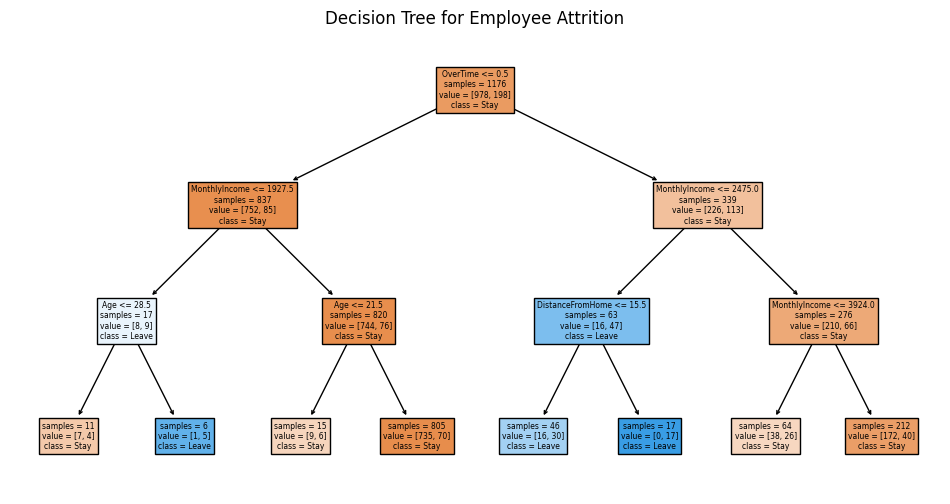

In [49]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=["Stay", "Leave"],
    filled=True,
    impurity=False,)
plt.title("Decision Tree for Employee Attrition")
plt.show()

#“What’s the business interpretation of OverTime ≤ 0.5 being the first split?”
#“If you were HR, what action would you take for employees working overtime and earning < $2,500?”

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Load and preprocess dataset
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df = df[["Attrition", "Age", "JobSatisfaction", "MonthlyIncome", "DistanceFromHome", "OverTime"]]
df["Attrition"] = df["Attrition"].map({"Yes": 1, "No": 0})
df["OverTime"] = df["OverTime"].map({"Yes": 1, "No": 0})

X = df.drop("Attrition", axis=1)
y = df["Attrition"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Define base heatmap with colored background
colors = [["green", "blue"], ["yellow", "red"]]
flat_colors = sum(colors, [])  # Flatten the list
plt.figure(figsize=(6, 5))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap=sns.color_palette(flat_colors, as_cmap=True),
                 xticklabels=["Stay", "Leave"], yticklabels=["Stay", "Leave"],
                 cbar=False, linewidths=0.5, linecolor='black', square=True)

# Custom overlay labels
labels = [["✅ True Stay", "❌ False Leave"],
          ["⚠️ False Stay", "✅ True Leave"]]

for i in range(2):
    for j in range(2):
        ax.text(j + 0.5, i + 0.8, labels[i][j],
                ha='center', va='center', fontsize=9, color='black', weight='bold')

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Color Coded with Labels")
plt.tight_layout()
plt.show()



ModuleNotFoundError: No module named 'seaborn'

In [29]:
#understanding the importance of drivers / levers based on feature importance

importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importances:\n", importance)

Feature Importances:
 MonthlyIncome       0.527081
OverTime            0.365678
Age                 0.064874
DistanceFromHome    0.042366
JobSatisfaction     0.000000
dtype: float64


In [31]:
# Prepare experiment
results = []
test_sizes = [0.1, 0.2, 0.3]
random_states = [1, 42, 99]

# Loop over combinations
for test_size in test_sizes:
    for rand in random_states:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand)
        model = DecisionTreeClassifier(max_depth=3, random_state=rand)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        fi = model.feature_importances_

        results.append({
            "test_size": test_size,
            "random_state": rand,
            "accuracy": round(acc, 3),
            "Age_importance": round(fi[0], 3),
            "JobSatisfaction_importance": round(fi[1], 3),
            "MonthlyIncome_importance": round(fi[2], 3),
            "DistanceFromHome_importance": round(fi[3], 3),
            "OverTime_importance": round(fi[4], 3)
        })

# Convert to DataFrame
results_df = pd.DataFrame(results)
results_df

#💡 What students learn from this:
#How model accuracy varies by test split and seed
#Which features consistently matter most
#Why tuning and reproducibility matter in ML

,test_size,random_state,accuracy,Age_importance,JobSatisfaction_importance,MonthlyIncome_importance,DistanceFromHome_importance,OverTime_importance
0,0.1,1,0.796,0.165,0.000,0.394,0.089,0.352
1,0.1,42,0.830,0.073,0.000,0.530,0.050,0.347
2,0.1,99,0.864,0.057,0.026,0.528,0.050,0.339
3,0.2,1,0.827,0.179,0.000,0.393,0.095,0.333
4,0.2,42,0.850,0.065,0.000,0.527,0.042,0.366
5,0.2,99,0.840,0.214,0.000,0.408,0.000,0.378
6,0.3,1,0.850,0.165,0.000,0.399,0.078,0.358
7,0.3,42,0.857,0.129,0.000,0.463,0.057,0.351
8,0.3,99,0.848,0.184,0.000,0.426,0.044,0.345


## 🧠 Reflection Questions
- Which features are most influential in predicting attrition?
- How would you act on this insight as an HR leader?
- Would you use this model to automate decisions or guide conversations?
